In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
sns.set_theme()


In [2]:
df = pd.read_csv('preprocessing.csv',index_col=0)
print(df.shape)
df.head()

(466246, 13)


,crime_type,crime_category,date,reported,y_lon,x_lat,neighborhood,dates,times,equity_score,pop_2010,crime_count,neighborhood_crime_rate
0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 20:36:00,-105.018825,39.714268,Valverde,2022-01-04,11:30:00,1.6,3941.0,1,822.633849
1,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,2022-01-03 21:12:00,-105.014892,39.711518,Valverde,2022-01-03,19:47:00,1.6,3941.0,1,822.633849
6,criminal-mischief-other,public-disorder,2019-06-19 16:30:00,2019-06-20 14:21:00,-105.014690,39.712854,Valverde,2019-06-19,16:30:00,1.6,3941.0,1,822.633849
7,criminal-mischief-other,public-disorder,2019-09-11 16:30:00,2019-09-13 14:55:00,-105.012846,39.711710,Valverde,2019-09-11,16:30:00,1.6,3941.0,1,822.633849
8,criminal-mischief-other,public-disorder,2021-11-08 02:42:00,2021-11-08 03:31:00,-105.024081,39.722317,Valverde,2021-11-08,02:42:00,1.6,3941.0,1,822.633849


In [3]:
df = df.iloc[:,[1,4,5,6,9]]
df.head()

,crime_category,y_lon,x_lat,neighborhood,equity_score
0,public-disorder,-105.018825,39.714268,Valverde,1.6
1,public-disorder,-105.014892,39.711518,Valverde,1.6
6,public-disorder,-105.014690,39.712854,Valverde,1.6
7,public-disorder,-105.012846,39.711710,Valverde,1.6
8,public-disorder,-105.024081,39.722317,Valverde,1.6


In [4]:
df.isnull().sum().sort_values(ascending=False)

crime_category    0
y_lon             0
x_lat             0
neighborhood      0
equity_score      0
dtype: int64

In [5]:
df.crime_category.value_counts()

traffic-accident                106846
all-other-crimes                 74413
theft-from-motor-vehicle         49760
public-disorder                  49619
larceny                          49587
auto-theft                       39854
burglary                         24244
drug-alcohol                     22630
other-crimes-against-persons     21996
aggravated-assault               13652
robbery                           6327
white-collar-crime                6217
arson                              720
murder                             381
Name: crime_category, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
y_lon,466246.0,-104.928508,1.793875,-115.46406,-105.004766,-104.980425,-104.916195,5.000000e-07
x_lat,466246.0,39.721679,0.679421,0.00000,39.707754,39.739852,39.760192,3.990431e+01
equity_score,466246.0,2.931285,0.801037,1.60000,2.300000,3.100000,3.600000,4.700000e+00


In [7]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,crime_category,y_lon,x_lat,neighborhood,equity_score
19,public-disorder,-105.012183,39.711534,Valverde,1.6
20,public-disorder,-105.012183,39.711534,Valverde,1.6
21,public-disorder,-105.012183,39.711534,Valverde,1.6
40,public-disorder,-105.024643,39.721718,Valverde,1.6
41,public-disorder,-105.015630,39.719839,Valverde,1.6
...,...,...,...,...,...
305545,murder,-104.923881,39.763476,Northeast Park Hill,2.1
305546,murder,-104.923881,39.763476,Northeast Park Hill,2.1
321366,murder,-104.809881,39.773188,Montbello,2.3
339206,murder,-104.861964,39.658404,Kennedy,2.8


In [8]:
df.shape

(466246, 5)

In [9]:
factors = ['y_lon', 'x_lat', 'neighborhood', 'equity_score']
y=df.crime_category
X=df[factors]
X=pd.get_dummies(X)

In [10]:
X.columns

Index(['y_lon', 'x_lat', 'equity_score', 'neighborhood_Athmar Park',
       'neighborhood_Auraria', 'neighborhood_Baker', 'neighborhood_Barnum',
       'neighborhood_Barnum West', 'neighborhood_Bear Valley',
       'neighborhood_Belcaro', 'neighborhood_Berkeley', 'neighborhood_CBD',
       'neighborhood_Capitol Hill', 'neighborhood_Central Park',
       'neighborhood_Chaffee Park', 'neighborhood_Cheesman Park',
       'neighborhood_Cherry Creek', 'neighborhood_City Park',
       'neighborhood_City Park West', 'neighborhood_Civic Center',
       'neighborhood_Clayton', 'neighborhood_Cole',
       'neighborhood_College View / South Platte',
       'neighborhood_Congress Park', 'neighborhood_Cory - Merrill',
       'neighborhood_Country Club', 'neighborhood_DIA',
       'neighborhood_East Colfax', 'neighborhood_Elyria Swansea',
       'neighborhood_Five Points', 'neighborhood_Fort Logan',
       'neighborhood_Gateway / Green Valley Ranch', 'neighborhood_Globeville',
       'neighborhood_G

In [11]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [12]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot as plt

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)


In [15]:
y_pred_prob

array([[0.        , 0.04861496, 0.        , ..., 0.01133025, 0.01216658,
        0.03729701],
       [0.        , 0.46493009, 0.        , ..., 0.        , 0.48201928,
        0.        ],
       [0.06916667, 0.08527778, 0.        , ..., 0.25666667, 0.02333333,
        0.04333333],
       ...,
       [0.06446352, 0.13188629, 0.        , ..., 0.14833557, 0.03148444,
        0.        ],
       [0.        , 0.23      , 0.        , ..., 0.16883766, 0.03      ,
        0.        ],
       [0.03788559, 0.10228318, 0.        , ..., 0.21598013, 0.        ,
        0.        ]])

In [16]:
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.386
Random Forest: f1-score=0.370


30


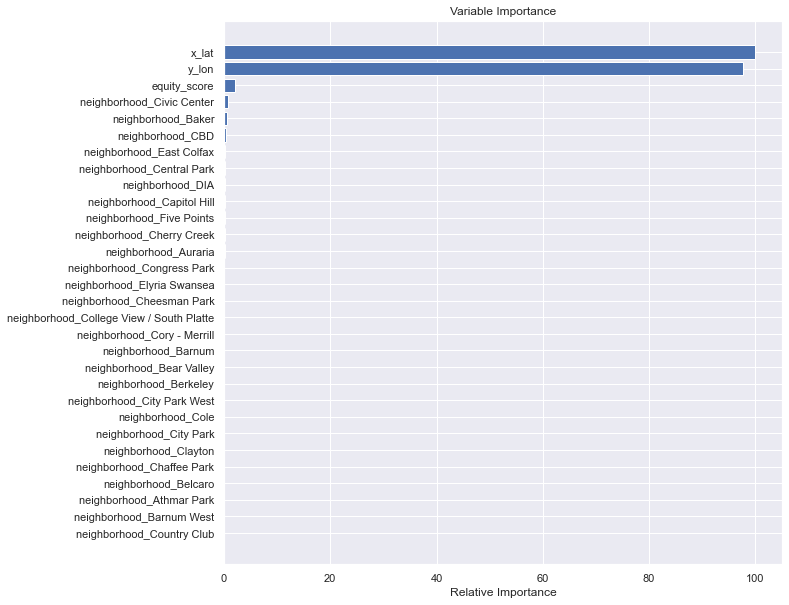

In [17]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [19]:
# Import xgboost
import xgboost as xgb

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


[14:15:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.308268


# got Very Low Result Scores. Lets try adding some data. 

In [59]:
df = pd.read_csv('preprocessing.csv',index_col=0,parse_dates=['date','reported'])
print(df.shape)
df.head()

(466246, 13)


,crime_type,crime_category,date,reported,y_lon,x_lat,neighborhood,dates,times,equity_score,pop_2010,crime_count,neighborhood_crime_rate
0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 20:36:00,-105.018825,39.714268,Valverde,2022-01-04,11:30:00,1.6,3941.0,1,822.633849
1,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,2022-01-03 21:12:00,-105.014892,39.711518,Valverde,2022-01-03,19:47:00,1.6,3941.0,1,822.633849
6,criminal-mischief-other,public-disorder,2019-06-19 16:30:00,2019-06-20 14:21:00,-105.014690,39.712854,Valverde,2019-06-19,16:30:00,1.6,3941.0,1,822.633849
7,criminal-mischief-other,public-disorder,2019-09-11 16:30:00,2019-09-13 14:55:00,-105.012846,39.711710,Valverde,2019-09-11,16:30:00,1.6,3941.0,1,822.633849
8,criminal-mischief-other,public-disorder,2021-11-08 02:42:00,2021-11-08 03:31:00,-105.024081,39.722317,Valverde,2021-11-08,02:42:00,1.6,3941.0,1,822.633849


In [60]:
bins = [0,5,10,14,18,20,24]
categories = ['Early Morning','Morning','Midday','Afternoon','Evening','Night']
ToD = pd.cut(df['date'].dt.hour,bins = bins, labels = categories)
df.insert(4,'time_of_day',ToD)


DOW = df['date'].dt.day_name()
df.insert(5,'day_of_week',DOW)
weekend = df["date"].dt.weekday >= 5
df.insert(6,'IsWeekend',weekend)

In [61]:
df

,crime_type,crime_category,date,reported,time_of_day,day_of_week,IsWeekend,y_lon,x_lat,neighborhood,dates,times,equity_score,pop_2010,crime_count,neighborhood_crime_rate
0,criminal-mischief-other,public-disorder,2022-01-04 11:30:00,2022-01-04 20:36:00,Midday,Tuesday,False,-105.018825,39.714268,Valverde,2022-01-04,11:30:00,1.6,3941.0,1,822.633849
1,criminal-mischief-other,public-disorder,2022-01-03 19:47:00,2022-01-03 21:12:00,Evening,Monday,False,-105.014892,39.711518,Valverde,2022-01-03,19:47:00,1.6,3941.0,1,822.633849
6,criminal-mischief-other,public-disorder,2019-06-19 16:30:00,2019-06-20 14:21:00,Afternoon,Wednesday,False,-105.014690,39.712854,Valverde,2019-06-19,16:30:00,1.6,3941.0,1,822.633849
7,criminal-mischief-other,public-disorder,2019-09-11 16:30:00,2019-09-13 14:55:00,Afternoon,Wednesday,False,-105.012846,39.711710,Valverde,2019-09-11,16:30:00,1.6,3941.0,1,822.633849
8,criminal-mischief-other,public-disorder,2021-11-08 02:42:00,2021-11-08 03:31:00,Early Morning,Monday,False,-105.024081,39.722317,Valverde,2021-11-08,02:42:00,1.6,3941.0,1,822.633849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463385,homicide-family,murder,2020-02-09 20:10:00,2020-02-09 21:41:00,Evening,Sunday,True,-105.020804,39.786323,Chaffee Park,2020-02-09,20:10:00,3.1,3874.0,1,601.961797
465536,homicide-family,murder,2019-05-15 21:34:00,2019-05-15 21:34:00,Night,Wednesday,False,-104.949130,39.759391,Skyland,2019-05-15,21:34:00,2.6,3106.0,1,540.244688
465537,homicide-other,murder,2017-06-30 23:15:00,2017-07-01 02:23:00,Night,Friday,False,-104.959438,39.758050,Skyland,2017-06-30,23:15:00,2.6,3106.0,1,540.244688
465538,homicide-other,murder,2019-09-11 23:56:00,2019-09-12 02:51:00,Night,Wednesday,False,-104.946110,39.756261,Skyland,2019-09-11,23:56:00,2.6,3106.0,1,540.244688


In [62]:
df = df.iloc[:,[1,4,5,6,7,8,9,12]]
df.head()

,crime_category,time_of_day,day_of_week,IsWeekend,y_lon,x_lat,neighborhood,equity_score
0,public-disorder,Midday,Tuesday,False,-105.018825,39.714268,Valverde,1.6
1,public-disorder,Evening,Monday,False,-105.014892,39.711518,Valverde,1.6
6,public-disorder,Afternoon,Wednesday,False,-105.014690,39.712854,Valverde,1.6
7,public-disorder,Afternoon,Wednesday,False,-105.012846,39.711710,Valverde,1.6
8,public-disorder,Early Morning,Monday,False,-105.024081,39.722317,Valverde,1.6


In [63]:
y=df.crime_category
X=df.iloc[:,1:]
X=pd.get_dummies(X)

In [64]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [66]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)


In [69]:
y_pred_prob

array([[0.        , 0.01555556, 0.        , ..., 0.        , 0.00611111,
        0.        ],
       [0.00333333, 0.93907937, 0.        , ..., 0.00333333, 0.02425397,
        0.        ],
       [0.75666667, 0.07      , 0.        , ..., 0.00333333, 0.00666667,
        0.00666667],
       ...,
       [0.00811888, 0.47015079, 0.        , ..., 0.0448187 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00777778, ..., 0.        , 0.55      ,
        0.00333333],
       [0.        , 0.23473413, 0.        , ..., 0.05366667, 0.01495238,
        0.24689683]])

In [70]:
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.322
Random Forest: f1-score=0.313


30


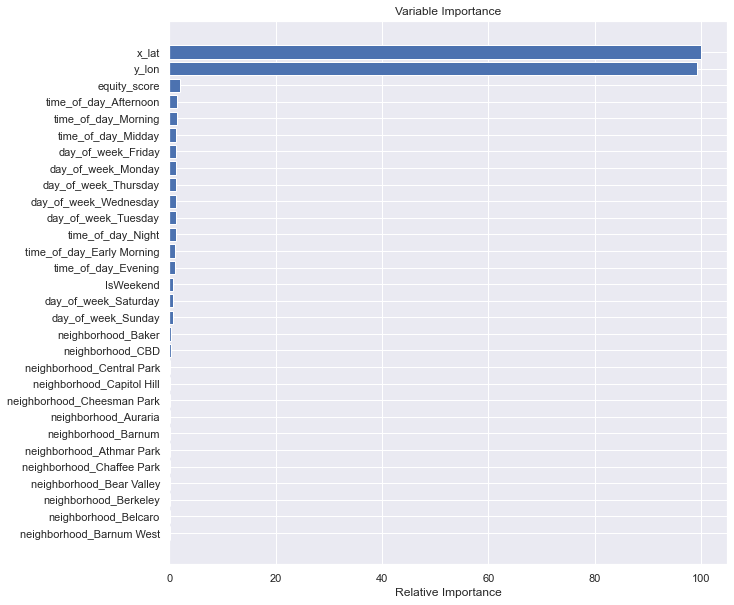

In [71]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [72]:
# Import xgboost
import xgboost as xgb

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


C:\Users\derek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\derek\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:21:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.320976


30


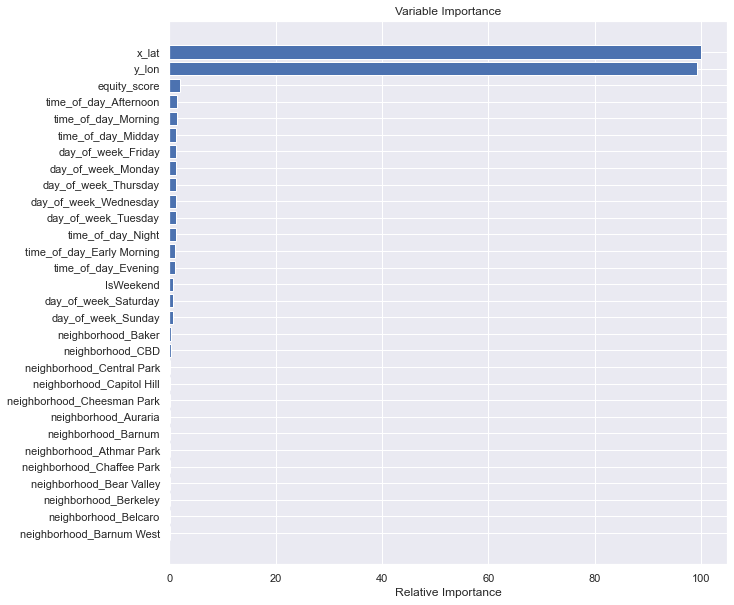

In [73]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()